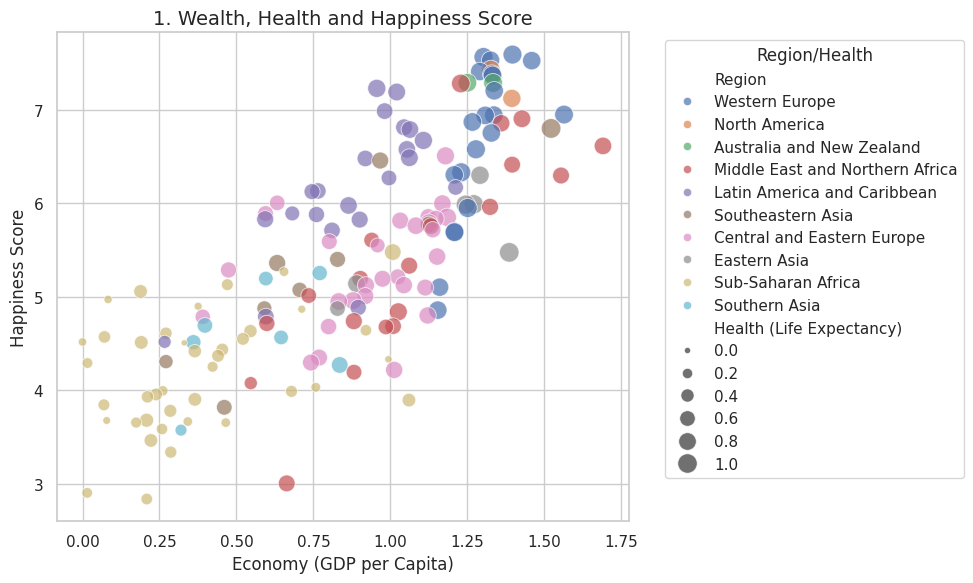

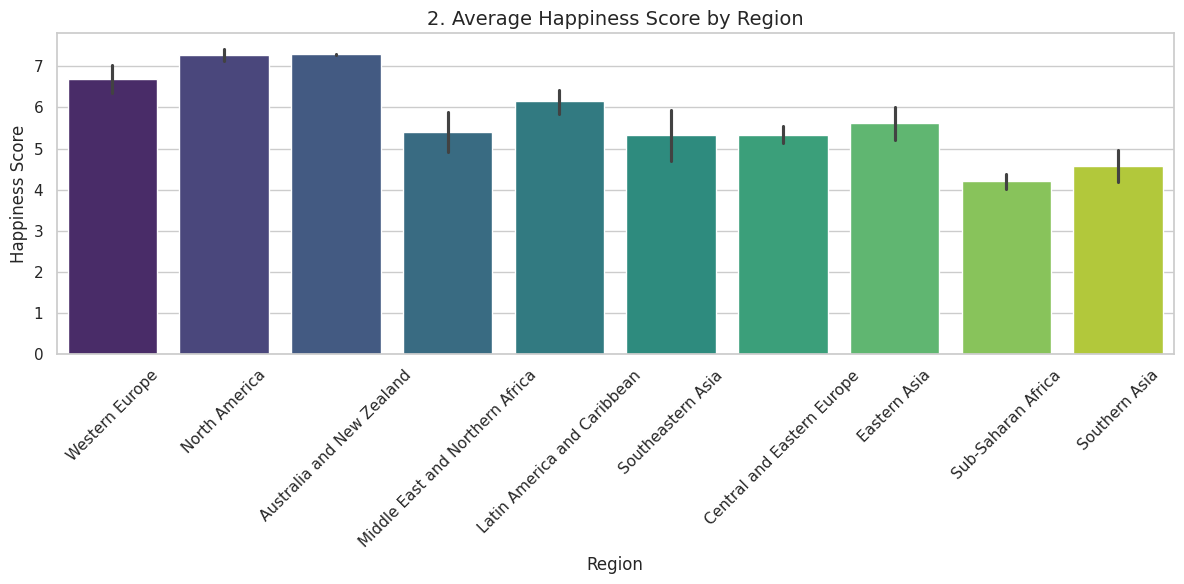

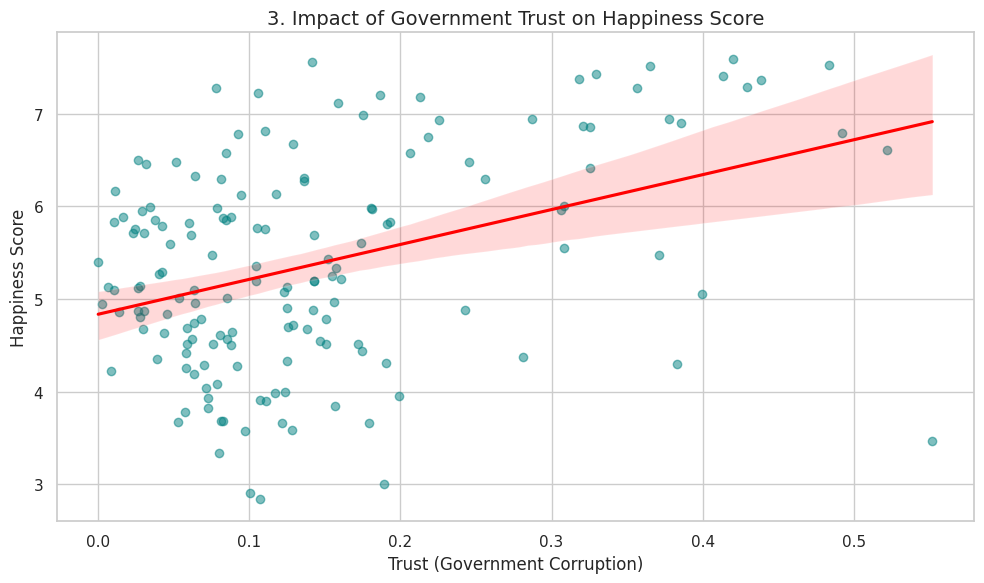

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Load the data ---
url = "https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv"
df = pd.read_csv(url)

# --- 2. Save the file ---
df.to_csv('world_happiness_report_full.csv', index=False)

# --- 3. Process the data ---
df_processed = df.copy()
mean_score = df_processed['Happiness Score'].mean()
df_processed['Happiness_Status'] = df_processed['Happiness Score'].apply(
    lambda x: 'Above Average' if x > mean_score else 'Below Average'
)

# --- 4. Visualize ---
sns.set_theme(style="whitegrid")

# גרף 1: המקורי - הקשר בין עושר, בריאות ואושר
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_processed, x='Economy (GDP per Capita)', y='Happiness Score',
                hue='Region', size='Health (Life Expectancy)', sizes=(20, 200), alpha=0.7)
plt.title('1. Wealth, Health and Happiness Score', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Region/Health')
plt.tight_layout()
plt.show()

# גרף 2: השוואת אזורים (מתוקן ללא אזהרות)
plt.figure(figsize=(12, 6))
sns.barplot(
    data=df_processed, x='Region', y='Happiness Score',
    estimator='mean', hue='Region', palette='viridis', legend=False
)
plt.xticks(rotation=45)
plt.title('2. Average Happiness Score by Region', fontsize=14)
plt.tight_layout()
plt.show()

# גרף 3: שחיתות מול אושר
plt.figure(figsize=(10, 6))
sns.regplot(
    data=df_processed, x='Trust (Government Corruption)', y='Happiness Score',
    scatter_kws={'alpha':0.5, 'color':'teal'}, line_kws={'color':'red'}
)
plt.title('3. Impact of Government Trust on Happiness Score', fontsize=14)
plt.tight_layout()
plt.show()